In [1]:
import os
import skimage
import cv2 as cv
import scipy as sp
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
image_path = os.path.join(os.getcwd(), "..", "dataset", "annotations2")
image_pairs = [
    (os.path.join(image_path, f), os.path.join(image_path, ".".join([f.split(".")[0][:-1] + "2", f.split(".")[-1]]))) 
    for f in list(filter(lambda f: f.split(".")[0][-1] == "1", os.listdir(image_path)))
]
measurement = list(filter(lambda f: f.split(".")[1] == "xlsx", os.listdir(image_path)))[0]
df = pd.read_excel(os.path.join(image_path, measurement))

In [3]:
RED = (255, 0, 0)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
CYAN = (255, 255, 0)
PURPLE = (255, 0, 255)

In [4]:
len(image_pairs)

50

In [5]:
image_index = 0

In [6]:
def display_images(img1: np.array, img2: np.array) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    axes[0].imshow(img1, cmap="gray")
    axes[0].axis("off")
    axes[1].imshow(img2, cmap="gray")
    axes[1].axis("off")
    fig.tight_layout()

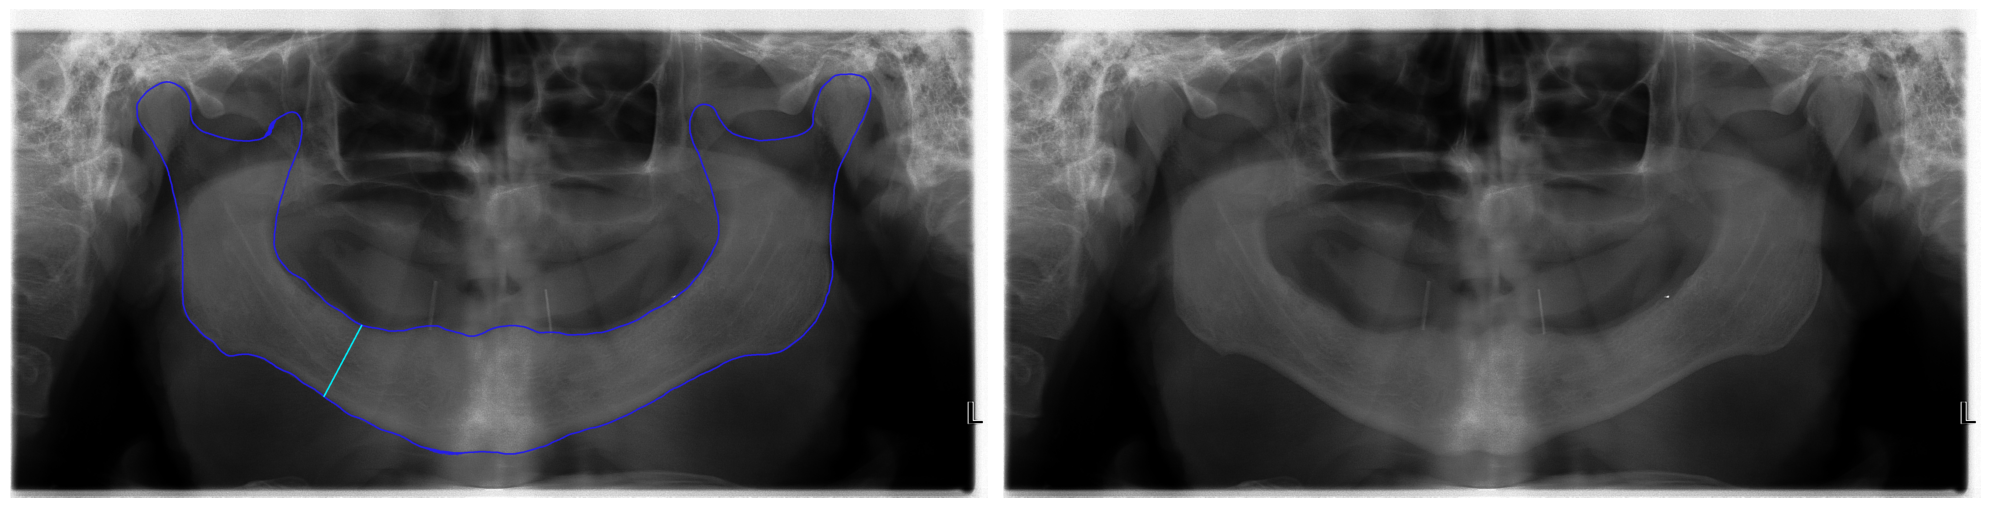

In [7]:
img_without_annotation = cv.imread(image_pairs[image_index][0])
img_with_annotation = cv.imread(image_pairs[image_index][1])
display_images(img_with_annotation, img_without_annotation)

In [8]:
img_shape_y, img_shape_x = img_without_annotation.shape[:-1]
region_of_interest_min_x, region_of_interest_max_x = round(img_shape_x * 0.3), round(img_shape_x * 0.7)
region_of_interest_min_y, region_of_interest_max_y = round(img_shape_y * 0.4), round(img_shape_y * 0.8)

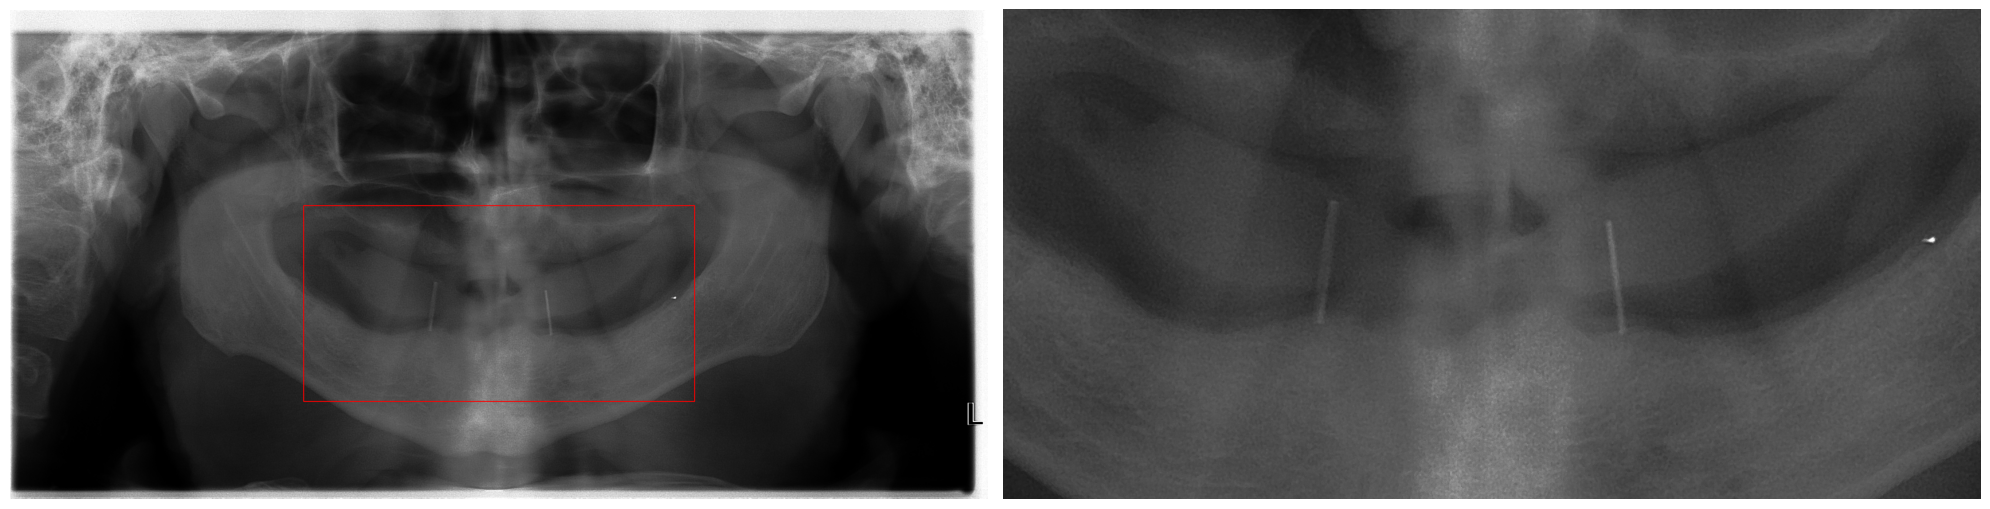

In [9]:
img = img_without_annotation.copy()
img_roi = img_without_annotation.copy()[region_of_interest_min_y:region_of_interest_max_y, region_of_interest_min_x:region_of_interest_max_x]
cv.rectangle(img, (region_of_interest_min_x, region_of_interest_min_y), (region_of_interest_max_x, region_of_interest_max_y), RED, 2)
display_images(img, img_roi)

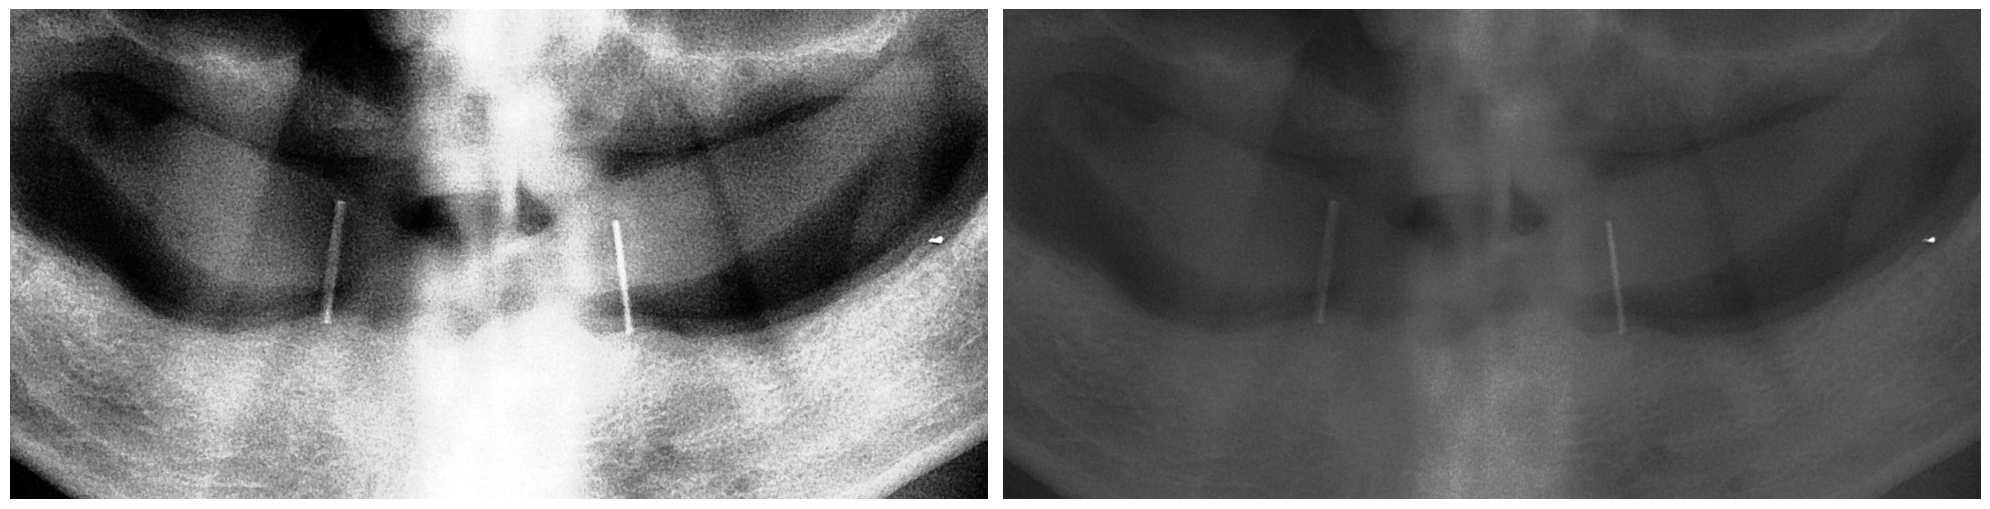

In [11]:
gray = cv.cvtColor(img_roi, cv.COLOR_BGR2GRAY)
gamma_correct = skimage.exposure.adjust_gamma(gray, 0.7)
equalized = skimage.exposure.equalize_hist(gamma_correct)


display_images(equalized, img_roi)

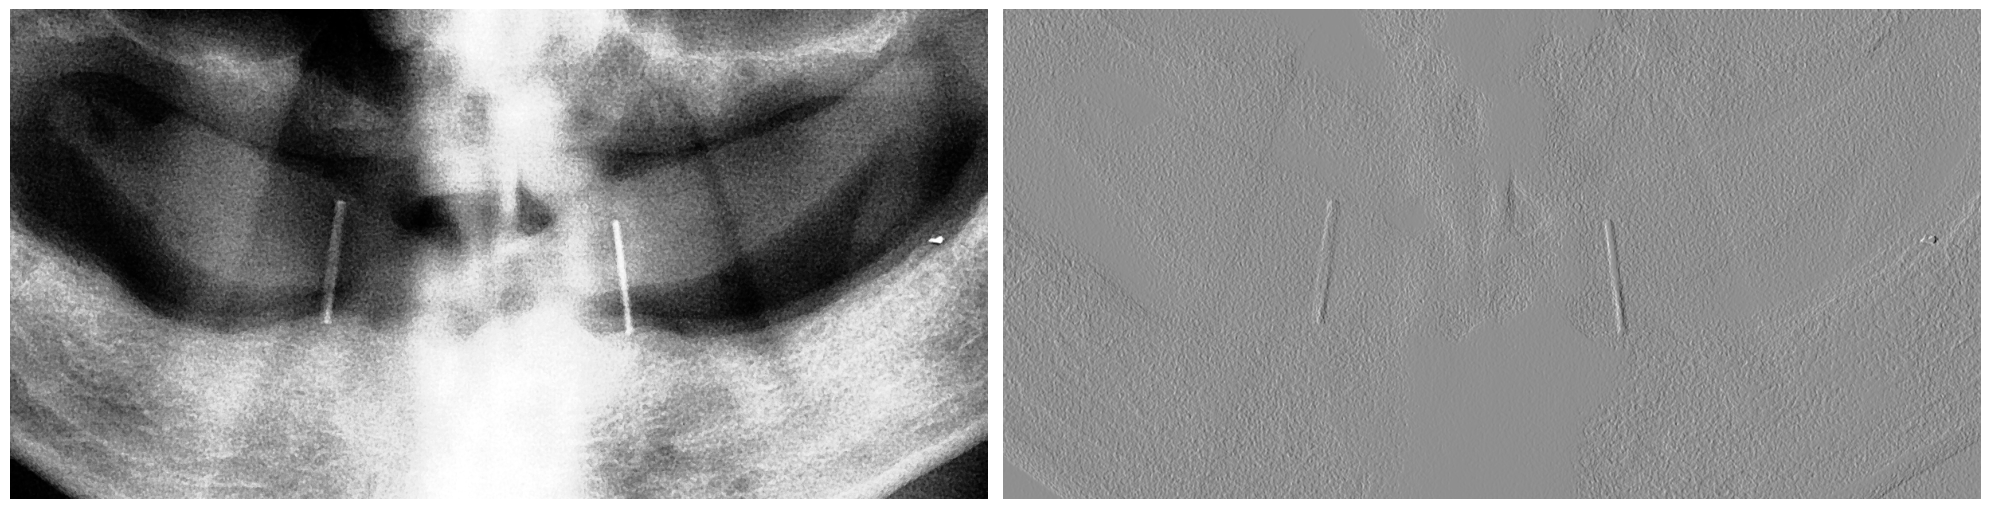

In [12]:
scharr_v = skimage.filters.scharr_v(equalized)
display_images(equalized, scharr_v)

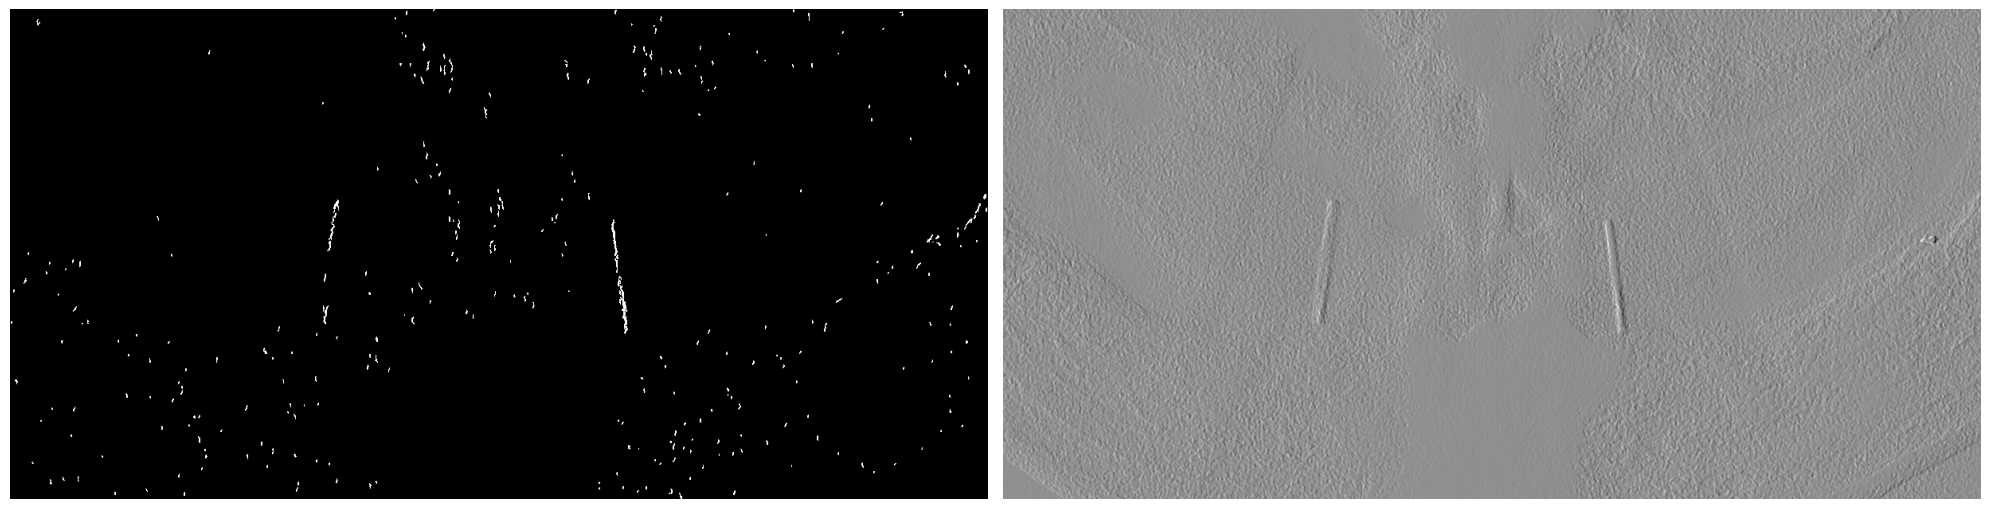

In [13]:
display_images(skimage.filters.apply_hysteresis_threshold(scharr_v, 0.1, 0.2), scharr_v)

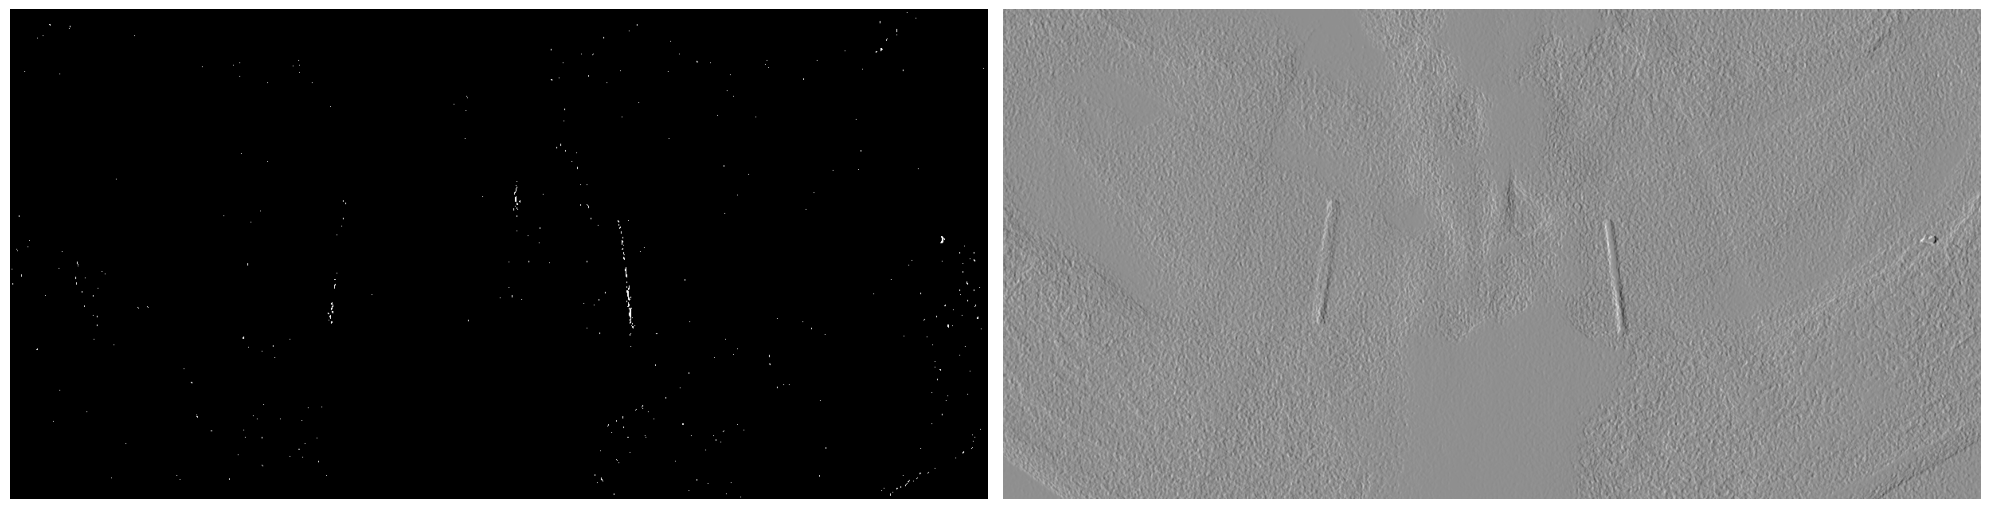

In [14]:
display_images(~skimage.filters.apply_hysteresis_threshold(scharr_v, -0, -0.2), scharr_v)